In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.python.keras.optimizers import Adam


In [2]:
from mnist import MNIST
data = MNIST(data_dir="data/MNIST/")

In [3]:
print("Size of:")
print("- Training-set:\t\t{}".format(data.num_train))
print("- Validation-set:\t{}".format(data.num_val))
print("- Test-set:\t\t{}".format(data.num_test))

Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


Copy some of the data-dimensions for convenience.

In [4]:
# The number of pixels in each dimension of an image.
img_size = data.img_size

# The images are stored in one-dimensional arrays of this length.
img_size_flat = data.img_size_flat

# Tuple with height and width of images used to reshape arrays.
img_shape = data.img_shape

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = data.img_shape_full

# Number of classes, one class for each of 10 digits.
num_classes = data.num_classes

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = data.num_channels

In [5]:
print(f'img_size_flat={img_size_flat}; img_shape={img_shape};img_shape_full={img_shape_full};num_classes={num_classes};num_channels={num_channels}' )

img_size_flat=784; img_shape=(28, 28);img_shape_full=(28, 28, 1);num_classes=10;num_channels=1


## Sequential Model


In [6]:
# Start construction of the Keras Sequential model.
model = Sequential()

# Add an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
model.add(InputLayer(input_shape=(img_size_flat,)))

# The input is a flattened array with 784 elements,
# but the convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape(img_shape_full))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=2, filters=512, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=2, filters=128, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers
# to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# Last fully-connected / dense layer with softmax-activation
# for use in classification.
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 14, 14, 512)       5120      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 512)         0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 4, 4, 128)         589952    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total para

In [8]:
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training

In [9]:
history = model.fit(x=data.x_train, y=data.y_train, epochs=10, batch_size=128)

Epoch 1/10
55000/55000 [==============================] - 278s 5ms/step - loss: 0.2633 - acc: 0.9214
Epoch 2/10
55000/55000 [==============================] - 275s 5ms/step - loss: 0.0798 - acc: 0.9764
Epoch 3/10
55000/55000 [==============================] - 281s 5ms/step - loss: 0.0569 - acc: 0.9824
Epoch 4/10
55000/55000 [==============================] - 281s 5ms/step - loss: 0.0442 - acc: 0.9862
Epoch 5/10
55000/55000 [==============================] - 255s 5ms/step - loss: 0.0355 - acc: 0.9889
Epoch 6/10
55000/55000 [==============================] - 254s 5ms/step - loss: 0.0287 - acc: 0.9912
Epoch 7/10
55000/55000 [==============================] - 274s 5ms/step - loss: 0.0248 - acc: 0.9917
Epoch 8/10
55000/55000 [==============================] - 258s 5ms/step - loss: 0.0198 - acc: 0.9934
Epoch 9/10
55000/55000 [==============================] - 258s 5ms/step - loss: 0.0149 - acc: 0.9955
Epoch 10/10
55000/55000 [==============================] - 258s 5ms/step - loss: 0.0133 - a

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Accuracy plot

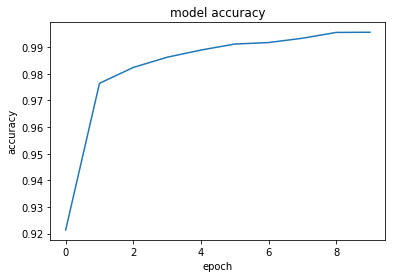

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

#### Loss plot

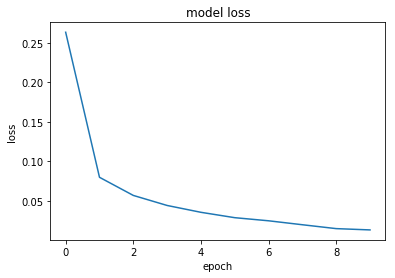

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Evaluation


In [13]:
result = model.evaluate(x=data.x_test,
                        y=data.y_test)

10000/10000 [==============================] - 9s 913us/step


Performance metrics for the test-set.

In [14]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.04403477009717026
acc 0.9849
